<a href="https://colab.research.google.com/github/NirjharDebnath/Optimisation-algorithms/blob/main/Optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np

In [39]:
def function_value(position):
    x, y = position
    return x**2 + y**2

In [57]:
import numpy as np

def function_value(position):
    # Example: Sphere function
    return np.sum(position**2)

class PSO:
    def __init__(self, n_particles, n_iterations, bounds, w=0.5, c1=1.5, c2=1.5):
        self.n_particles = n_particles
        self.n_iterations = n_iterations
        self.bounds = bounds
        self.w = w
        self.c1 = c1
        self.c2 = c2

        self.positions = np.random.uniform(self.bounds[0], bounds[1], (n_particles, len(bounds[0])))
        self.velocities = np.random.uniform(-1, 1, (n_particles, len(bounds[0])))

        self.pbest_positions = self.positions.copy()
        self.pbest_scores = np.array([function_value(i) for i in self.positions])
        self.gbest_position = self.pbest_positions[np.argmin(self.pbest_scores)]
        self.gbest_scores = np.min(self.pbest_scores)

    def optimize(self):
        for iteration in range(self.n_iterations):
            for i in range(self.n_particles):
                r1, r2 = np.random.random(), np.random.random()
                self.velocities[i] = (self.w * self.velocities[i] +
                                      self.c1 * r1 * (self.pbest_positions[i] - self.positions[i]) +
                                      self.c2 * r2 * (self.gbest_position - self.positions[i]))

                self.positions[i] += self.velocities[i]
                self.positions[i] = np.clip(self.positions[i], self.bounds[0], self.bounds[1])

                score = function_value(self.positions[i])

                if score < self.pbest_scores[i]:
                    self.pbest_scores[i] = score
                    self.pbest_positions[i] = self.positions[i]

                if score < self.gbest_scores:
                    self.gbest_scores = score
                    self.gbest_position = self.positions[i]

            print(f"Iteration {iteration + 1}: Best score = {self.gbest_scores}")

        return self.gbest_position, self.gbest_scores

# Example usage
bounds = (np.array([-10, -10]), np.array([10, 10]))
pso = PSO(n_particles=30, n_iterations=100, bounds=bounds)
best_position, best_score = pso.optimize()
print(f"Optimal position: {best_position}, Optimal score: {best_score}")


Iteration 1: Best score = 0.35057702208578234
Iteration 2: Best score = 0.18666014291395952
Iteration 3: Best score = 0.04100557035921042
Iteration 4: Best score = 0.04100557035921042
Iteration 5: Best score = 0.027906123786668242
Iteration 6: Best score = 0.027906123786668242
Iteration 7: Best score = 0.022759326405495137
Iteration 8: Best score = 0.022759326405495137
Iteration 9: Best score = 0.022759326405495137
Iteration 10: Best score = 0.0006189531826770601
Iteration 11: Best score = 0.0006189531826770601
Iteration 12: Best score = 0.0006189531826770601
Iteration 13: Best score = 0.0006189531826770601
Iteration 14: Best score = 0.0006189531826770601
Iteration 15: Best score = 0.0006189531826770601
Iteration 16: Best score = 0.0006189531826770601
Iteration 17: Best score = 0.0006189531826770601
Iteration 18: Best score = 0.00034515179070657555
Iteration 19: Best score = 0.00034515179070657555
Iteration 20: Best score = 0.0002934646262236387
Iteration 21: Best score = 0.00029346462

Iteration 1: Best score = 0.22799095803649863
Iteration 2: Best score = 0.22799095803649863
Iteration 3: Best score = 0.22799095803649863
Iteration 4: Best score = 0.0422061067853864
Iteration 5: Best score = 0.021259513327178535
Iteration 6: Best score = 0.021259513327178535
Iteration 7: Best score = 0.021259513327178535
Iteration 8: Best score = 0.0031487311391213777
Iteration 9: Best score = 0.0031487311391213777
Iteration 10: Best score = 0.0018187078940198184
Iteration 11: Best score = 0.0018187078940198184
Iteration 12: Best score = 0.0018187078940198184
Iteration 13: Best score = 0.0001450370787451452
Iteration 14: Best score = 0.0001450370787451452
Iteration 15: Best score = 0.0001450370787451452
Iteration 16: Best score = 0.00011391596309613759
Iteration 17: Best score = 0.00011391596309613759
Iteration 18: Best score = 0.00011391596309613759
Iteration 19: Best score = 0.00011391596309613759
Iteration 20: Best score = 0.00011391596309613759
Iteration 21: Best score = 1.6261077

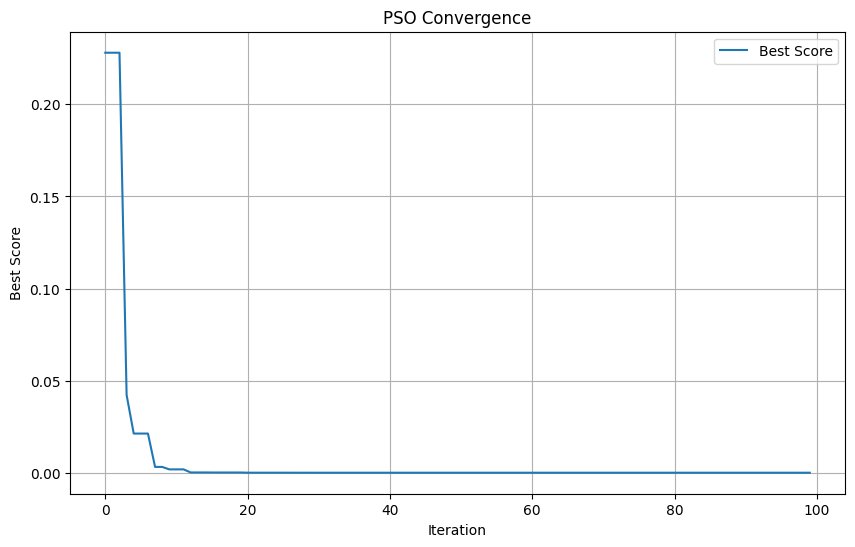

Optimal position: [-4.87697724e-11 -7.05328985e-11], Optimal score: 7.353380472680103e-21


In [58]:
import numpy as np
import matplotlib.pyplot as plt

def function_value(position):
    # Example: Sphere function
    return np.sum(position**2)

class PSO:
    def __init__(self, n_particles, n_iterations, bounds, w=0.5, c1=1.5, c2=1.5):
        self.n_particles = n_particles
        self.n_iterations = n_iterations
        self.bounds = bounds
        self.w = w
        self.c1 = c1
        self.c2 = c2

        self.positions = np.random.uniform(self.bounds[0], bounds[1], (n_particles, len(bounds[0])))
        self.velocities = np.random.uniform(-1, 1, (n_particles, len(bounds[0])))

        self.pbest_positions = self.positions.copy()
        self.pbest_scores = np.array([function_value(i) for i in self.positions])
        self.gbest_position = self.pbest_positions[np.argmin(self.pbest_scores)]
        self.gbest_scores = np.min(self.pbest_scores)

        # To track best score in each iteration
        self.convergence = []

    def optimize(self):
        for iteration in range(self.n_iterations):
            for i in range(self.n_particles):
                r1, r2 = np.random.random(), np.random.random()
                self.velocities[i] = (self.w * self.velocities[i] +
                                      self.c1 * r1 * (self.pbest_positions[i] - self.positions[i]) +
                                      self.c2 * r2 * (self.gbest_position - self.positions[i]))

                self.positions[i] += self.velocities[i]
                self.positions[i] = np.clip(self.positions[i], self.bounds[0], self.bounds[1])

                score = function_value(self.positions[i])

                if score < self.pbest_scores[i]:
                    self.pbest_scores[i] = score
                    self.pbest_positions[i] = self.positions[i]

                if score < self.gbest_scores:
                    self.gbest_scores = score
                    self.gbest_position = self.positions[i]

            # Track the best score for this iteration
            self.convergence.append(self.gbest_scores)
            print(f"Iteration {iteration + 1}: Best score = {self.gbest_scores}")

        return self.gbest_position, self.gbest_scores

    def plot_convergence(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.convergence, label="Best Score")
        plt.title("PSO Convergence")
        plt.xlabel("Iteration")
        plt.ylabel("Best Score")
        plt.legend()
        plt.grid()
        plt.show()

# Example usage
bounds = (np.array([-10, -10]), np.array([10, 10]))
pso = PSO(n_particles=30, n_iterations=100, bounds=bounds)
best_position, best_score = pso.optimize()

# Plot the convergence
pso.plot_convergence()

print(f"Optimal position: {best_position}, Optimal score: {best_score}")
